In [568]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

import random

## 4.1   Back to the Basics

### Value Assigment

#### One thing to remember: Assignment never copies the data. 

#### Python behaves differently when assigning values to strings and lists:

In [569]:
foo = 'Monty'
bar = foo
foo = 'Python'
bar

'Monty'

In strings, assigning the value of foo to bar, bar is NOT a copy of foo, bar is simply refers to the value "Monty". So when you change the value of foo, it does NOT affect bar. Two variables referring to the same value does NOT link these two variables. So changing one variable won't affect the other. 

#### Now let's look at lists

In [570]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'zzzzz'
bar

['Monty', 'zzzzz']

#### string is immutable, and list is mutable. So when you change the string, it creates a new string thus foo and bar are not referring to the same string anymore. While appending a value to list, since list is mutable appending a value to it does not make it a NEW list. It's still the same list. So the variables that refer to the list will both be affected.

Why this happened? Here when we assigning the value of foo to bar, we are not assigning the actual values. We are assigning "object reference". So when assigning foo to bar, bar will have the memory location of the object stored. 

More explanation here:
https://nedbatchelder.com/text/names.html

#### To further explain how list works, here is an example:

In [571]:
empty = []

# here we assign empty lists to a new list
nested = [empty, empty, empty] 
nested

[[], [], []]

Now let's only try to change the first empty list in "nested":

In [572]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

#### The key here is the append() method does NOT mutate the list. It still refers to the same list. See example below:

Append

In [573]:
def augment_twice(a_list, val):
    """Put `val` on the end of `a_list` twice."""
    a_list.append(val)
    a_list.append(val)

nums = [1, 2, 3]
augment_twice(nums, 4)
print(nums)         # [1, 2, 3, 4, 4]

[1, 2, 3, 4, 4]


Mutable list, when the function ends the local names are destroyed, values that are no longer referenced are reclaimed, but others remail. Remember the names (i.e. "nums" inside the function when the function is called) are LOCAL to FUNCTION. So when the function ends the names in function go away. In the first example the list after the function is called still refers to the same list since the function used append. 

However in the 2nd exmaple the function modifed the list, so the list refers to a new reference. But when the function ends the "nums" in the function went away. The "nums" you see refers back to the local variable assigned before calling the function. So it refers back to [1, 2, 3]. Remember in the 1st example the local variable in the function was also destroyed when the function ends. But since the list nums is not a new list, it simplied appended some value to it, the local variable outside the function still refer to the same list.

Example 1 and 2 are exmaples of mutate a list and rebind a list.

In [574]:
def augment_twice_bad(a_list, val):
    """Put `val` on the end of `a_list` twice."""
    a_list = a_list + [val, val]

nums = [1, 2, 3]
augment_twice_bad(nums, 4) # after you call the function and "nums"
# inside the function get destroyed. 
print(nums)         # [1, 2, 3]  # the "nums" you see here refers
# to the list we created before calling the function

[1, 2, 3]


#### An example what I mean by "local variables are destroyed when function ends"

In [604]:
def square(a):
    b = a * a
    return b
z = square(10)
b


NameError: name 'b' is not defined

Here "b" is a local variable in the function. You can do z to call the function and get the returned value

In [605]:
z

100

#### Exercise

In [576]:
nested = [[]]*3
nested

[[], [], []]

In [577]:
nested[0].append('zzz')
nested

[['zzz'], ['zzz'], ['zzz']]

In [578]:
for list_obj in nested:
    print id(list_obj)

4490743464
4490743464
4490743464


Here we can see all listed are in the same object reference.

#### Modifying an object via an object reference vs. overwriting an object reference

The previous example modifies an object reference

Now let's **overwrite** the object reference with a new object:

In [579]:
nested = [[]]*3
# nested[0].append('zzz')
nested

[[], [], []]

In [580]:
nested[1] = ['7777']
nested

[[], ['7777'], []]

#### The difference between append and assigning value is: append does not change the object reference, it only appends a value to it. Where as assigning values overwirtes the object reference. Once overwritten, it is a new object now.

### Equality

In [581]:
size = 5
python = ['Python']
nested_list = [python] * 5


In [582]:
nested_list[0] == nested_list[1] == nested_list[2] == nested_list[3] == nested_list[4]

True

In [583]:
nested_list[0] is nested_list[1] is nested_list[2] is nested_list[3] is nested_list[4]

True

### Conditionals

#### An if statement will take a nonempty string or list as true, while an empty string or list as false.

In [584]:
list_ = ['nonempty', '', 'oh nonempty again', '', '']
for ele in list_:
    if ele:
        print ele

nonempty
oh nonempty again


#### Difference between if...elif and if...if

### Sequence

#### Tuples

In [585]:
t = 'sdas', '3', 5

In [586]:
t

('sdas', '3', 5)

#### Zip function

Thus, zip() takes the items of two or more sequences and "zips" them together into a single list of tuples.

In [587]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']

In [588]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

#### enumerate

"enumerate()" returns pairs consisting of an index and the item at that index

In [589]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

#### Operating on Sequence Types

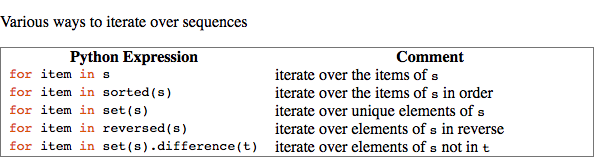

In [590]:
from IPython.display import Image
Image(filename='iterate through sequence.png')


### Combining different sequence types

#### When to use tuple and when to use list?

### Questions of styles

Topics here:

- Code layout
- Procedural and declarative style
- Use of loop variables

#### Python coding style

- Use 4 spaces for indentations
- Lines should be less than 80 characters long
- Break a line if necessary

#### Procedural vs declarative style

Procedural coding:

In [591]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

u'unextinguishable'

Declarative coding:

In [592]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

[u'unextinguishable',
 u'transubstantiate',
 u'inextinguishable',
 u'incomprehensible']

In [593]:
x, y = 5, 3

# the 2nd range() determines the number of rows
array = [[set() for i in range(y)] for j in range(x)]
array

[[set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()]]

In [594]:
array[1][1].add('Alex')
# array[1][1] = 'Alex'
array

[[set(), set(), set()],
 [set(), {'Alex'}, set()],
 [set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()]]

In [595]:
for x in array:
    for y in x:
        print id(y)

4490229880
4490406240
4490231040
4490229648
4490230344
4490230808
4490230576
4490231272
4490231504
4490887248
4490887480
4490887712
4490887944
4490888176
4490888408


In [596]:
x, y = 5, 3

# when you multiply it's copying, so the ids of each item is the same
array = [[set()] * y] * x
array

[[set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()],
 [set(), set(), set()]]

In [597]:
array[3][2].add('BBC')

array

[[{'BBC'}, {'BBC'}, {'BBC'}],
 [{'BBC'}, {'BBC'}, {'BBC'}],
 [{'BBC'}, {'BBC'}, {'BBC'}],
 [{'BBC'}, {'BBC'}, {'BBC'}],
 [{'BBC'}, {'BBC'}, {'BBC'}]]

In [598]:
for x in array:
    for y in x:
        print id(y)

4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640
4490888640


In [599]:
array[0][2] = 'Tadaaaa' # what matters is the send number "2"
# if you change the first number "0" to other it does not matter
array

[[{'BBC'}, {'BBC'}, 'Tadaaaa'],
 [{'BBC'}, {'BBC'}, 'Tadaaaa'],
 [{'BBC'}, {'BBC'}, 'Tadaaaa'],
 [{'BBC'}, {'BBC'}, 'Tadaaaa'],
 [{'BBC'}, {'BBC'}, 'Tadaaaa']]

In [600]:
for x in array:
    for y in x:
        print id(y)

4490888640
4490888640
4666382208
4490888640
4490888640
4666382208
4490888640
4490888640
4666382208
4490888640
4490888640
4666382208
4490888640
4490888640
4666382208


### Functions: the foundations of structured programming